In [1]:
import sys
import traceback
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xarray as xr
import scipy.stats as stats
from metpy.cbook import get_test_data
import netCDF4 as nc  

import pyOptimalEstimation as pyOE

%matplotlib inline
sns.set(style='ticks', palette='deep')


sys.path.append('lib')
import nonScatMWRadTran
import supporting_routines

In [2]:
prior = xr.open_dataset("E:/SAMEER/pyOptimalEstimation_examples-master/pyOptimalEstimation_examples-master/data/SRINAGAR_IGRA.nc", engine='netcdf4')
prior

<xarray.Dataset>
Dimensions:   (time: 8435, height: 20)
Coordinates:
  * time      (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-05-01T14:00:00
  * height    (height) float64 0.0 711.9 1.575e+03 ... 7.351e+03 7.386e+03
Data variables:
    temp      (time, height) float64 ...
    q         (time, height) float64 ...
    bar_pres  (time, height) float64 ...

In [3]:
prior.bar_pres

<xarray.DataArray 'bar_pres' (time: 8435, height: 20)>
[168700 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-05-01T14:00:00
  * height   (height) float64 0.0 711.9 1.575e+03 ... 7.351e+03 7.386e+03
Attributes:
    long_name:  Pressure in Pa
    units:      Pa

In [4]:


import pandas as pd

# Assuming new_df is your DataFrame with a column named 'time'

# Convert the DataFrame to a table format
# table1 = pd.DataFrame({'time': prior['time']})
table1= pd.DataFrame (prior.bar_pres)

# Display the table

print(table1)
table1

           0        1        2        3        4        5        6        7   \
0     84700.0  79100.0  73300.0  70000.0  68400.0  63700.0  60000.0  56000.0   
1     84400.0  70000.0  63800.0  61100.0  60000.0  50000.0  40000.0  30000.0   
2     84500.0  80000.0  70000.0  60000.0  58300.0  50000.0  40000.0  30000.0   
3     70000.0  62900.0  60000.0  50000.0  40000.0  37700.0  30300.0  30000.0   
4     84200.0  70000.0  62900.0  60000.0  50000.0  40000.0  37700.0  30300.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
8430  84600.0  83400.0  82000.0  81500.0  79500.0  77200.0  75900.0  72600.0   
8431  84800.0  84700.0  84400.0  84100.0  83900.0  82700.0  81800.0  81300.0   
8432  84500.0  82400.0  81000.0  80800.0  79300.0  78300.0  76000.0  74700.0   
8433  84600.0  70000.0  50000.0  40000.0  30000.0  25000.0      NaN      NaN   
8434  84500.0  83000.0  80100.0  79800.0  78800.0  76800.0  75600.0  74400.0   

           8        9        10       1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,84700.0,79100.0,73300.0,70000.0,68400.0,63700.0,60000.0,56000.0,50000.0,47800.0,40000.0,30000.0,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,84400.0,70000.0,63800.0,61100.0,60000.0,50000.0,40000.0,30000.0,27000.0,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,84500.0,80000.0,70000.0,60000.0,58300.0,50000.0,40000.0,30000.0,26400.0,25000.0,21300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,70000.0,62900.0,60000.0,50000.0,40000.0,37700.0,30300.0,30000.0,25000.0,24400.0,21200.0,20000.0,18500.0,17500.0,NaN,NaN,NaN,NaN,NaN,NaN
4,84200.0,70000.0,62900.0,60000.0,50000.0,40000.0,37700.0,30300.0,30000.0,25000.0,24400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8430,84600.0,83400.0,82000.0,81500.0,79500.0,77200.0,75900.0,72600.0,70400.0,70000.0,67100.0,65200.0,59200.0,53400.0,50000.0,49400.0,46700.0,43400.0,40700.0,40000.0
8431,84800.0,84700.0,84400.0,84100.0,83900.0,82700.0,81800.0,81300.0,80600.0,79700.0,79100.0,77700.0,75500.0,73700.0,71600.0,70000.0,69700.0,69200.0,68400.0,56900.0
8432,84500.0,82400.0,81000.0,80800.0,79300.0,78300.0,76000.0,74700.0,73100.0,70000.0,64200.0,61800.0,61600.0,59600.0,58500.0,57400.0,56200.0,55500.0,53700.0,53100.0
8433,84600.0,70000.0,50000.0,40000.0,30000.0,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


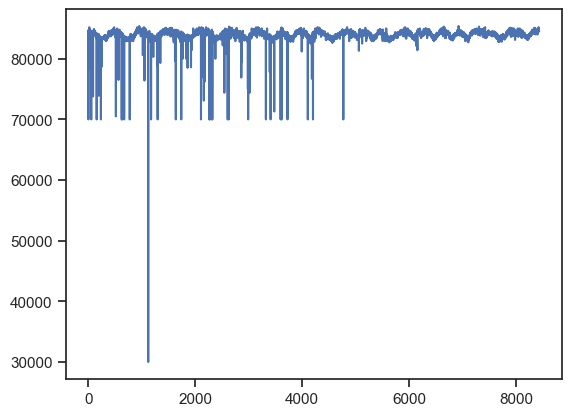

In [5]:
plt.plot(table1[0])

In [6]:
prior.q

<xarray.DataArray 'q' (time: 8435, height: 20)>
[168700 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-05-01T14:00:00
  * height   (height) float64 0.0 711.9 1.575e+03 ... 7.351e+03 7.386e+03
Attributes:
    long_name:  Relative humidity
    units:      %

In [7]:
prior.temp

<xarray.DataArray 'temp' (time: 8435, height: 20)>
[168700 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-05-01T14:00:00
  * height   (height) float64 0.0 711.9 1.575e+03 ... 7.351e+03 7.386e+03
Attributes:
    long_name:  temperature
    units:      K

In [8]:
import pandas as pd

# Specify the path to your CSV file with escaped backslashes
csv_file_path = "C:\\Users\\angsh\\Downloads\\SRINAGAR_IGRA_DATES.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df)


             Test_time
0     01-01-2000 00:00
1     02-01-2000 12:00
2     03-01-2000 00:00
3     04-01-2000 00:00
4     04-01-2000 12:00
...                ...
8430  28-12-2023 12:00
8431  29-12-2023 00:00
8432  29-12-2023 12:00
8433  30-12-2023 00:00
8434  30-12-2023 12:00

[8435 rows x 1 columns]


In [9]:
import pandas as pd
import xarray as xr

# Read the CSV file into a pandas DataFrame
csv_file_path = "C:\\Users\\angsh\\Downloads\\SRINAGAR_IGRA_DATES.csv"
df = pd.read_csv(csv_file_path)

# Convert the 'Test_time' column to datetime64
df['Test_time'] = pd.to_datetime(df['Test_time'], format='%d-%m-%Y %H:%M')

# Assuming you have already loaded your data into prior
# prior: xarray.Dataset

# Make sure that df is sorted by 'Test_time'
df = df.sort_values(by='Test_time')

# If 'time' is already a coordinate in prior and you want to replace its values,
# you can use the .assign_coords() method instead of direct assignment:
prior = prior.assign_coords(time=df['Test_time'])
# prior = prior.assign_coords(time=df.index)
prior = prior.assign_coords(height=prior.height)


# Now the 'time' coordinate in prior has been replaced with the 'Test_time' values from df
prior

<xarray.Dataset>
Dimensions:   (time: 8435, height: 20)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 ... 2023-12-30T12:00:00
  * height    (height) float64 0.0 711.9 1.575e+03 ... 7.351e+03 7.386e+03
Data variables:
    temp      (time, height) float64 ...
    q         (time, height) float64 ...
    bar_pres  (time, height) float64 8.47e+04 7.91e+04 ... 5.23e+04 5.07e+04

In [10]:
import pandas as pd

# Assuming new_df is your DataFrame with a column named 'time'

# Convert the DataFrame to a table format
table = pd.DataFrame({'time': prior['time']})

# Display the table

print(table)
table

                    time
0    2000-01-01 00:00:00
1    2000-01-02 12:00:00
2    2000-01-03 00:00:00
3    2000-01-04 00:00:00
4    2000-01-04 12:00:00
...                  ...
8430 2023-12-28 12:00:00
8431 2023-12-29 00:00:00
8432 2023-12-29 12:00:00
8433 2023-12-30 00:00:00
8434 2023-12-30 12:00:00

[8435 rows x 1 columns]


,time
0,2000-01-01 00:00:00
1,2000-01-02 12:00:00
2,2000-01-03 00:00:00
3,2000-01-04 00:00:00
4,2000-01-04 12:00:00
...,...
8430,2023-12-28 12:00:00
8431,2023-12-29 00:00:00
8432,2023-12-29 12:00:00
8433,2023-12-30 00:00:00


In [11]:
prior.time

<xarray.DataArray 'time' (time: 8435)>
array(['2000-01-01T00:00:00.000000000', '2000-01-02T12:00:00.000000000',
       '2000-01-03T00:00:00.000000000', ..., '2023-12-29T12:00:00.000000000',
       '2023-12-30T00:00:00.000000000', '2023-12-30T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2023-12-30T12:00:00

In [12]:
prior.q

<xarray.DataArray 'q' (time: 8435, height: 20)>
[168700 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2023-12-30T12:00:00
  * height   (height) float64 0.0 711.9 1.575e+03 ... 7.351e+03 7.386e+03
Attributes:
    long_name:  Relative humidity
    units:      %

In [13]:
# import pandas as pd

# # Assuming 'table' is your DataFrame with a column named 'time'

# # Step 1: Get unique dates
# unique_dates = table['time'].unique()

# # Step 2: Randomly select 5 unique dates
# random_dates = pd.Series(unique_dates).sample(n=8, random_state=42)  # Set random_state for reproducibility

# print(random_dates)


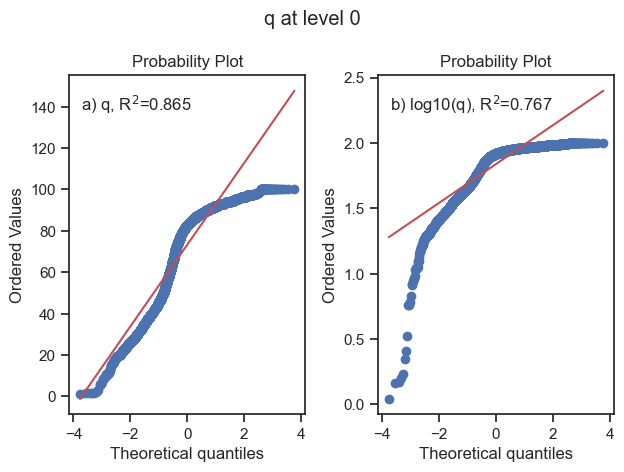

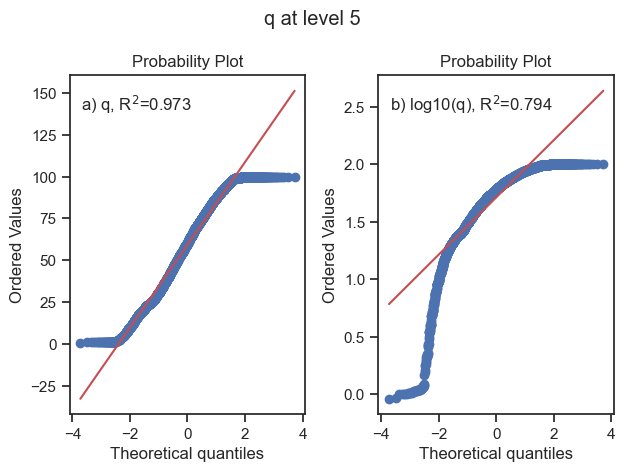

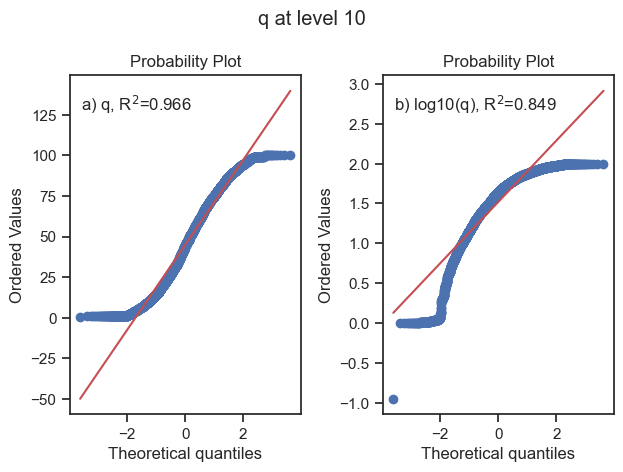

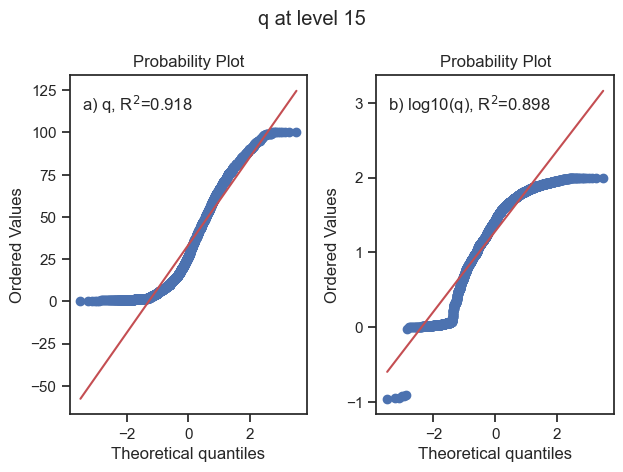

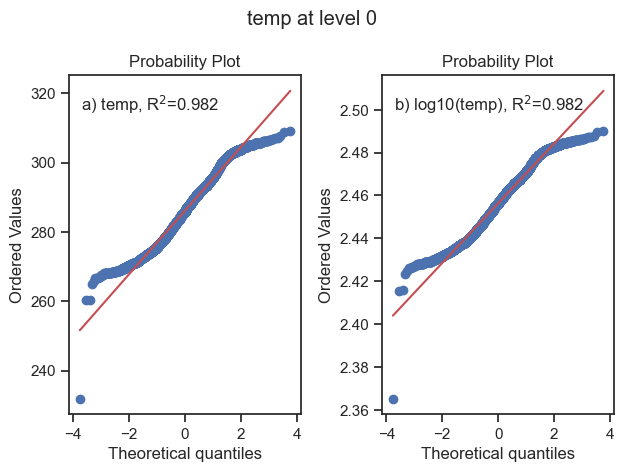

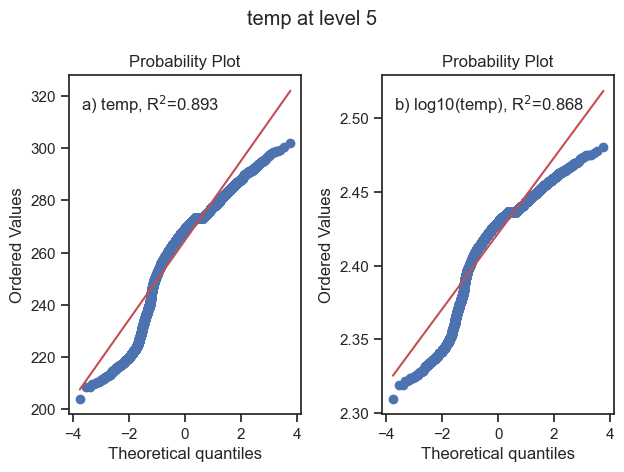

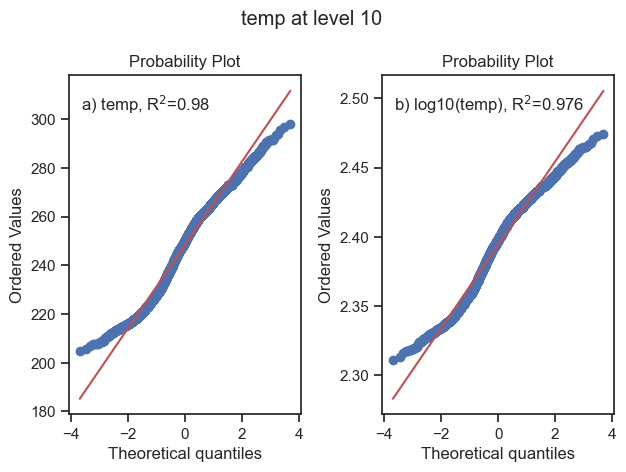

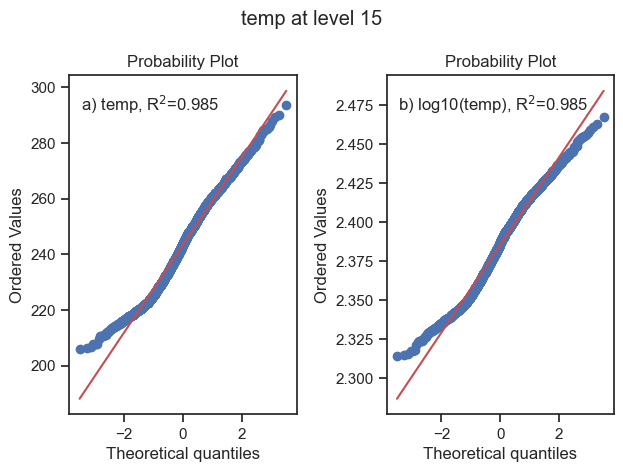

In [14]:
for var in ['q', 'temp']:
    for h in range(0, 20, 5):
        fig, (ax, ax1) = plt.subplots(ncols=2)
        plt.suptitle('%s at level %i' % (var,h))
        (osm, osr), (slope, intercept, r) = stats.probplot(
            prior[var].isel(height=h).dropna('time').values,
            dist="norm",
            plot=ax,
            fit=True,
            rvalue=False)
        ax.text(
            0.05,
            0.95,
            '%s) %s, R$^2$=%.3g' % ('a', var, r**2),
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax.transAxes)

        (osm, osr), (slope, intercept, r) = stats.probplot(
            np.log10(prior[var].isel(height=h).dropna('time').values),
            dist="norm",
            plot=ax1,
            fit=True,
            rvalue=False)
        ax1.text(
            0.05,
            0.95,
            '%s) %s, R$^2$=%.3g' % ('b', 'log10(%s)'%var, r**2),
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax1.transAxes)
        fig.tight_layout()

In [15]:
import numpy as np
import pandas as pd

# Assuming 'prior' is your pandas DataFrame
prior['q'] = np.log10(prior['q'])



In [16]:
prior['q']

<xarray.DataArray 'q' (time: 8435, height: 20)>
array([[1.94724755, 1.89035061, 1.6679208 , ...,        nan,        nan,
               nan],
       [1.60312598, 1.41313445, 1.31362623, ...,        nan,        nan,
               nan],
       [1.96036915, 1.74334853, 1.45548434, ...,        nan,        nan,
               nan],
       ...,
       [1.7870942 , 1.65650022, 1.59128787, ..., 1.16253239, 1.18832667,
        1.18386361],
       [1.99035821, 1.35418353, 1.83948659, ...,        nan,        nan,
               nan],
       [1.81854768, 1.69055096, 1.58858527, ..., 1.54808827, 1.70046677,
        1.61522464]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2023-12-30T12:00:00
  * height   (height) float64 0.0 711.9 1.575e+03 ... 7.351e+03 7.386e+03
Attributes:
    long_name:  Relative humidity
    units:      %

In [17]:
profileTT = np.array([
    '2018-11-24T12:00:00.000000000', '2009-06-01T00:00:00.000000000',
    '2023-09-27T00:00:00.000000000', '2011-07-22T00:00:00.000000000',
     ],dtype='datetime64[ns]')
profiles = prior.sel(time=profileTT)
prior = prior.drop_sel(time=profileTT)
nLev = len(prior.height)
nLev

# 02-02-2000 00:00
# 02-02-2000 12:00
# 03-02-2000 00:00
# 03-02-2000 12:00
# 04-02-2000 00:00
# 04-02-2000 12:00
# 05-02-2000 00:00
# 05-02-2000 12:00

#    2008-10-14 00:00:00
#   2004-05-29 12:00:00
#   2015-09-21 12:00:00
#   2000-07-22 12:00:00
#    2000-06-13 12:00:00
#      2018-03-10 12:00:00
# 2008-08-14 12:00:00 

# '2008-08-14T12:00:00.000000000',


# profileTT = np.array([
#     '2017-12-21T12:00:00.000000000', '2004-05-23T00:00:00.000000000',
#    '2001-06-06T12:00:00.000000000', '2011-11-03T00:00:00.000000000',
#      ],dtype='datetime64[ns]')

20

In [18]:
priors = {'all': prior}

seasons = [
    'DJF',
    'MAM',
    'JJA',
    'SON',
]
months = (
    [12, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11],
)
for season, month in zip(seasons, months):
    priors[season] = prior.where(
        np.in1d(prior['time.month'], month)[:, np.newaxis]).dropna(
            'time', how='all')

In [19]:
# prior_qts = {}
# for season in priors.keys():
#     prior_q = priors[season]['q'].to_pandas()
#     prior_q.columns = ['%05i_q' % (i) for i in prior_q.columns]
#     prior_t = priors[season]['temp'].to_pandas()
#     prior_t.columns = ['%05i_t' % (i) for i in prior_t.columns]
#     prior_qts[season] = pd.concat((prior_q, prior_t), axis=1)
#     prior_qts[season] = prior_qts[season].reindex(
#         sorted(prior_qts[season].columns), axis=1)

# prior_qts

prior_qts = {}
for season in priors.keys():
    prior_q = priors[season]['q'].to_pandas()
    prior_q.columns = ['%05i_q' % (i) for i in prior_q.columns]
    prior_t = priors[season]['temp'].to_pandas()
    prior_t.columns = ['%05i_t' % (i) for i in prior_t.columns]
    prior_qts[season] = pd.concat((prior_q, prior_t), axis=1)
    prior_qts[season] = prior_qts[season].reindex(
        sorted(prior_qts[season].columns), axis=1)

prior_qts

{'all':                       00000_q  00000_t   00711_q  00711_t   01574_q  01574_t  \
 time                                                                           
 2000-01-01 00:00:00  1.947248   268.45  1.890351   275.55  1.667921   271.85   
 2000-01-02 12:00:00  1.603126   283.55  1.413134   278.15  1.313626   273.15   
 2000-01-03 00:00:00  1.960369   268.05  1.743349   274.95  1.455484   272.05   
 2000-01-04 00:00:00  1.605107   273.95  1.567433   273.15  1.555859   270.05   
 2000-01-04 12:00:00  1.575651   284.95  1.519643   278.75  1.567433   273.15   
 ...                       ...      ...       ...      ...       ...      ...   
 2023-12-28 12:00:00  1.818255   280.95  1.816184   279.55  1.689031   279.75   
 2023-12-29 00:00:00  1.925335   270.65  1.961159   270.45  1.990294   270.05   
 2023-12-29 12:00:00  1.787094   280.95  1.656500   279.75  1.591288   279.95   
 2023-12-30 00:00:00  1.990358   270.85  1.354184   273.75  1.839487   252.85   
 2023-12-30 12:00:00 

In [20]:
x_cov = []
x_mean = []

for season in ['all'] + seasons:

    x_cov1 = prior_qts[season].cov().rename_axis('state', axis=0).rename_axis('stateT', axis=1)
    x_mean1 = prior_qts[season].mean().rename_axis('state', axis=0)

    x_cov.append(xr.DataArray(x_cov1))
    x_mean.append(xr.DataArray(x_mean1))

x_cov = xr.concat(x_cov, dim='season')
x_mean = xr.concat(x_mean, dim='season')

x_cov['season'] = ['all'] + seasons
x_mean['season'] = ['all'] + seasons

In [21]:
for season in x_cov.season:
    assert np.linalg.matrix_rank(x_cov.sel(season=season).to_pandas()) ==  x_cov.shape[-1]

Text(0, 0.5, 'Height [m]')

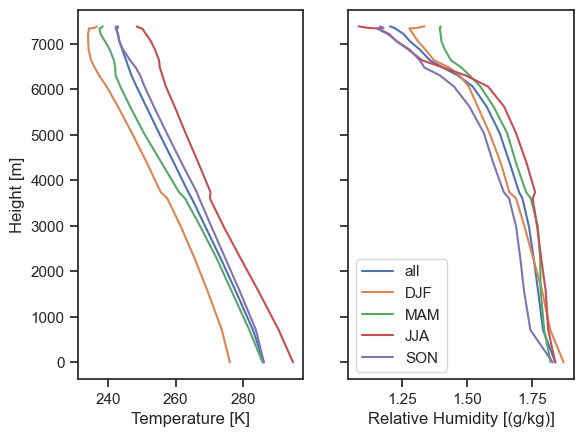

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
for season in ['all'] + seasons:
    t, q = supporting_routines.splitTQ(x_mean.sel(season=season).to_pandas())
    ax1.plot(t, t.index, label=season)
    ax2.plot(q, q.index, label=season)

ax2.legend()
ax1.set_xlabel('Temperature [K]')
ax2.set_xlabel('Relative Humidity [(g/kg)]')
ax1.set_ylabel('Height [m]')

Text(0.5, 1.0, '$\\mathbb{S}_{a}$ Humidity')

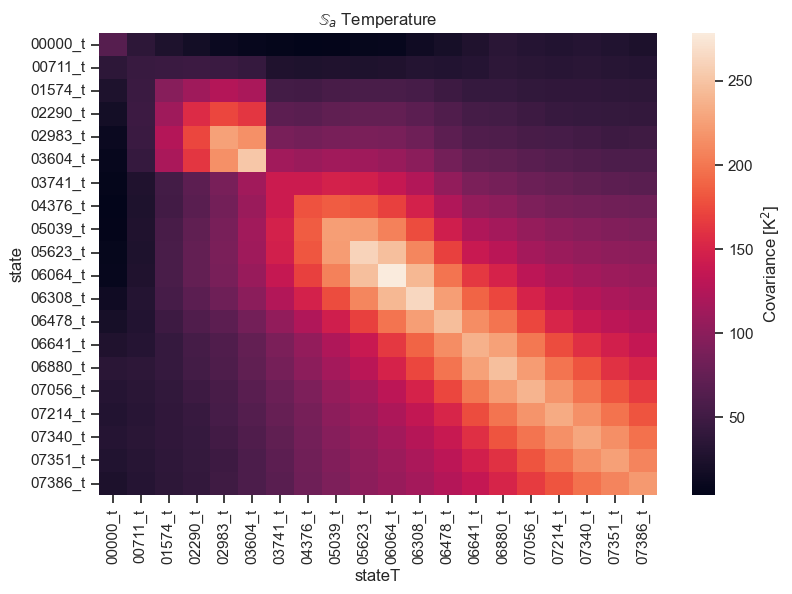

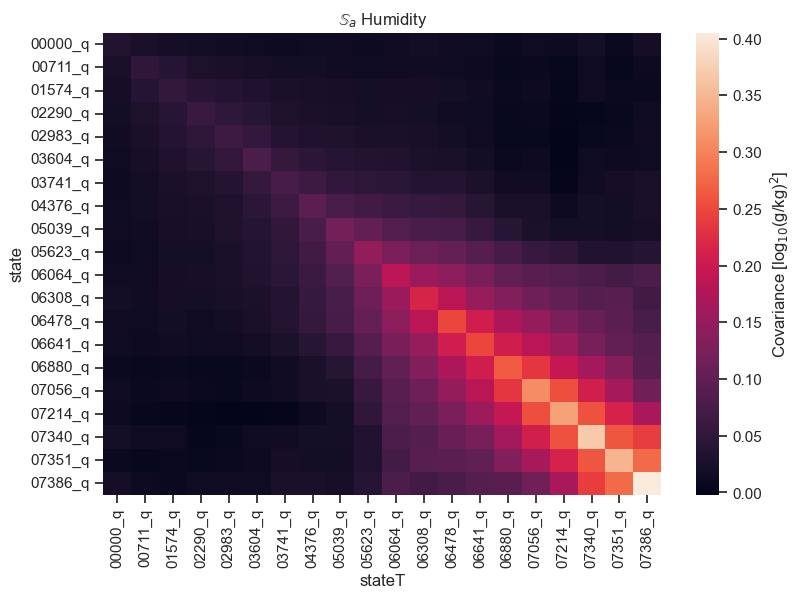

In [23]:
S_a = x_cov.sel(season='SON').to_pandas()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_a.iloc[1::2, 1::2], ax=ax, cbar_kws={'label':'Covariance [K$^2$]'})
ax.set_title('$\mathbb{S}_{a}$ Temperature')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_a.iloc[::2, ::2], ax=ax, cbar_kws={'label':'Covariance [log$_{10}$(g/kg)$^2$]'})
ax.set_title('$\mathbb{S}_{a}$ Humidity')

In [24]:
height = priors['all'].height

pressure = []
for k in ['all'] + seasons:
    pressure.append(priors[k].bar_pres.mean('time'))
pressure = xr.concat(pressure, dim='season')
pressure['season'] = ['all'] + seasons
pressure = pressure.to_pandas()
pressure

height,0.000000,711.930417,1574.701018,2290.137934,2983.033038,3604.694119,3741.872890,4376.620855,5039.967918,5623.658705,6064.097439,6308.468335,6478.091032,6641.685947,6880.900244,7056.691882,7214.525235,7340.003362,7351.176067,7386.125244
season,,,,,,,,,,,,,,,,,,,,
all,83938.946744,77285.446566,70041.769596,64524.416796,59646.801796,55338.318103,53647.782916,49551.688203,45620.028429,42368.202765,39998.943324,38631.674537,37687.985717,36786.192672,35592.019813,34767.856005,34066.275992,33544.635582,33544.074492,33436.889819
DJF,84371.865285,78179.067358,71069.262721,65686.551544,60893.055556,56211.323851,53614.183552,49504.334365,45453.610224,41843.047239,39007.072136,37052.830189,35784.383562,34662.203024,33784.476067,33435.587762,33069.215292,33239.370079,34139.361702,34393.273543
MAM,83954.011536,76873.675931,69820.566632,64690.947591,59729.443255,55111.902174,52885.238095,48451.004260,44259.750779,40945.101907,38748.565280,37525.020713,37071.585244,36463.207547,35375.616438,34511.164274,33686.037736,33367.972350,33744.047619,34107.169811
JJA,83372.215109,76209.176270,68452.948718,62269.544674,57039.043478,52929.740431,52238.222222,48568.450000,44945.561224,42033.546326,39854.169063,38815.263158,38034.992459,37511.642050,36344.208494,35387.121212,34229.283111,33262.482566,32683.993399,31994.531250
SON,84144.895602,77988.360729,71002.846975,65740.878530,61243.201455,57329.717200,55776.688674,51537.957710,47596.745407,44331.123288,41998.528546,40665.494360,39365.295438,37961.538462,36300.639269,35198.138573,34774.339623,34128.508124,34066.240876,34237.788018


In [25]:
import numpy as np
import pandas as pd

#Assuming profiles is an xarray Dataset or DataArray
profiles_t = profiles['temp'].to_pandas()
profiles_t
# # Proceed with the rest of the code as before
profiles_t.columns = ['%05i_t' % (i) for i in profiles_t.columns]
profiles_q = profiles['q'].to_pandas()
profiles_q.columns = ['%05i_q' % (i) for i in profiles_q.columns]
x_truths = pd.concat((profiles_t, profiles_q), axis=1)
x_truths = x_truths.reindex(sorted(x_truths.index), axis=0)
x_truths.columns.name = 'state'
x_truths.index.name = 'time'

# assert np.all(np.isfinite(x_truths))
x_truths



# import numpy as np
# import pandas as pd

# profiles_t = profiles['temp'].to_pandas()
# profiles_t.columns = ['%05i_t' % (i) for i in profiles_t.columns]
# profiles_q = profiles['q'].to_pandas()
# profiles_q.columns = ['%05i_q' % (i) for i in profiles_q.columns]

# x_truths = pd.concat((profiles_t, profiles_q), axis=1)
# x_truths = x_truths.reindex(sorted(x_truths.index), axis=0)
# # x_truths = np.nan_to_num(x_truths) 
# x_truths
# x_truths.columns.name = 'state'
# x_truths.index.name = 'time'

# # Replace missing values with mean
# x_truths_filled = x_truths.fillna(x_truths.mean())

# # Check for infinite values
# infinite_values = not np.all(np.isfinite(x_truths_filled.values))
# print("Infinite Values Present after filling missing values:", infinite_values)

# # Ensure all values are finite
# assert np.all(np.isfinite(x_truths_filled)), "Not all values are finite after filling missing values"

# # Now x_truths_filled can be used without any infinite or missing values

# # assert np.all(np.isfinite(x_truths))
# x_truths

state,00000_t,00711_t,01574_t,02290_t,02983_t,03604_t,03741_t,04376_t,05039_t,05623_t,...,06064_q,06308_q,06478_q,06641_q,06880_q,07056_q,07214_q,07340_q,07351_q,07386_q
time,,,,,,,,,,,,,,,,,,,,,
2009-06-01 00:00:00,287.75,287.15,289.15,289.55,288.95,287.15,283.15,273.15,270.25,267.25,...,1.861187,1.832261,1.472631,1.463978,1.480405,1.513698,1.836034,1.789529,1.555937,1.148742
2011-07-22 00:00:00,293.75,293.75,294.75,291.75,291.15,287.35,283.55,273.15,272.45,270.45,...,1.977390,1.937906,1.897140,1.979197,1.979125,1.982183,0.972358,0.610473,0.773608,0.923608
2018-11-24 12:00:00,285.15,283.15,282.75,281.55,279.95,278.95,279.35,280.15,275.95,268.05,...,1.749522,1.784752,1.512564,1.736748,1.774168,0.915017,1.059896,1.597105,1.509124,1.870217
2023-09-27 00:00:00,285.15,286.15,286.55,287.35,287.15,286.55,287.35,282.55,281.75,278.35,...,1.778582,1.843024,1.883080,1.934281,1.835605,1.693693,1.546576,1.273596,1.174539,1.204382


In [26]:
# x_truths_filled = x_truths.interpolate(method='linear', axis=1, limit_direction='both')  # Interpolate NaN values along columns using linear interpolation
# # print(x_truths_filled)
# x_truths=x_truths_filled
# x_truths

assert np.all(np.isfinite(x_truths))
x_truths

state,00000_t,00711_t,01574_t,02290_t,02983_t,03604_t,03741_t,04376_t,05039_t,05623_t,...,06064_q,06308_q,06478_q,06641_q,06880_q,07056_q,07214_q,07340_q,07351_q,07386_q
time,,,,,,,,,,,,,,,,,,,,,
2009-06-01 00:00:00,287.75,287.15,289.15,289.55,288.95,287.15,283.15,273.15,270.25,267.25,...,1.861187,1.832261,1.472631,1.463978,1.480405,1.513698,1.836034,1.789529,1.555937,1.148742
2011-07-22 00:00:00,293.75,293.75,294.75,291.75,291.15,287.35,283.55,273.15,272.45,270.45,...,1.977390,1.937906,1.897140,1.979197,1.979125,1.982183,0.972358,0.610473,0.773608,0.923608
2018-11-24 12:00:00,285.15,283.15,282.75,281.55,279.95,278.95,279.35,280.15,275.95,268.05,...,1.749522,1.784752,1.512564,1.736748,1.774168,0.915017,1.059896,1.597105,1.509124,1.870217
2023-09-27 00:00:00,285.15,286.15,286.55,287.35,287.15,286.55,287.35,282.55,281.75,278.35,...,1.778582,1.843024,1.883080,1.934281,1.835605,1.693693,1.546576,1.273596,1.174539,1.204382


In [27]:
# def forwardRT(X, pressure=None, zenithAngle=0, frequencies=[]):
#     # Convert X to a pandas DataFrame or Series object if it's a numpy array
#     if isinstance(X, np.ndarray):
#         X = pd.Series(X, index=[f'{i}_t' for i in pd.date_range(start='2015-09-21T12:00:00.000000000', periods=len(X), freq='D')])

#     # X contains T and Q, lets split the vector
#     t_index, q_index = supporting_routines.splitTQ(X)
#     # humidity is in log10 scale, convert to linear in kg/kg
#     temperature, humidity = supporting_routines.splitTQ(X)
#     humidity = (10**humidity) / 1000.  # Assign humidity before using it
#     # Height in meters comes from index of the temperature (or humidity) vector
#     heights = temperature.index
#     assert np.all(np.diff(heights) > 0)

#     # get absolute humidity from specific humidity
#     abs_humidity = supporting_routines.q2a(humidity, pressure, temperature)
    
#     # run the forward operator
#     TB, tau, tau_wv, tau_o2 = nonScatMWRadTran.STP_IM10(
#         heights,  # [m]  
#         temperature,  # [K]
#         pressure,  # [Pa]
#         abs_humidity,  # [kgm^-3]
#         zenithAngle,  # zenith angle of observation in deg.
#         frequencies,  # frequency vector in GHz
#     )
#     return TB


In [28]:
def forwardRT(X, pressure=None, zenithAngle=0, frequencies=[]):

    # X contains T and Q, lets split the vector
    temperature, humidity = supporting_routines.splitTQ(X)
    # humdity is in log10 scale, convert to linear in kg/kg
#     humidity = (10**humidity) / 1000.
    # Height in meters comes from index of the temperature (or humidty) vector
    heights = temperature.index
    assert np.all(np.diff(heights) > 0)

    # get absolute humidty from specific humdity
    abs_humidity = supporting_routines.q2a(humidity, pressure, temperature)
    
    # run the forward operator
    TB, tau, tau_wv, tau_o2 = nonScatMWRadTran.STP_IM10(
        heights,  # [m]  
        temperature,  # [K]
        pressure,  # [Pa]
        abs_humidity,  # [kgm^-3]
        zenithAngle,  # zenith angle of observation in deg.
        frequencies,  # frequency vector in GHz
    )
    return TB

In [29]:
frequencies = [ 
   22.24, 23.04, 23.84, 25.44, 26.24, 27.84, 31.4, 51.26, 52.28, 53.86, 54.94,
    56.66, 57.3, 58.
]

# 22.23 
# 23.03 
# 23.83
# 26.23
# 30. 
# 51.25 
# 52.280
# 53.85
# 54.94 
# 56.66 
# 57.29
# 58.8
# 59.4 
# 60. 



In [30]:
y_vars = np.array(frequencies)
x_vars = x_mean.state.values
print('y_vars:\n', y_vars)
print('x_vars:\n', x_vars)

y_vars:
 [22.24 23.04 23.84 25.44 26.24 27.84 31.4  51.26 52.28 53.86 54.94 56.66
 57.3  58.  ]
x_vars:
 ['00000_q' '00000_t' '00711_q' '00711_t' '01574_q' '01574_t' '02290_q'
 '02290_t' '02983_q' '02983_t' '03604_q' '03604_t' '03741_q' '03741_t'
 '04376_q' '04376_t' '05039_q' '05039_t' '05623_q' '05623_t' '06064_q'
 '06064_t' '06308_q' '06308_t' '06478_q' '06478_t' '06641_q' '06641_t'
 '06880_q' '06880_t' '07056_q' '07056_t' '07214_q' '07214_t' '07340_q'
 '07340_t' '07351_q' '07351_t' '07386_q' '07386_t']


In [31]:
season = 'SON'  #summer june july august
profile = np.datetime64( '2018-11-24T12:00:00.000000000')
x_truth = x_truths.loc[profile]
x_truth

state
00000_t    285.150000
00711_t    283.150000
01574_t    282.750000
02290_t    281.550000
02983_t    279.950000
03604_t    278.950000
03741_t    279.350000
04376_t    280.150000
05039_t    275.950000
05623_t    268.050000
06064_t    261.650000
06308_t    260.850000
06478_t    259.450000
06641_t    256.050000
06880_t    255.450000
07056_t    254.650000
07214_t    250.050000
07340_t    250.050000
07351_t    249.450000
07386_t    235.450000
00000_q      1.794146
00711_q      1.821439
01574_q      1.600540
02290_q      1.563754
02983_q      1.721745
03604_q      1.381985
03741_q      1.348802
04376_q      1.353143
05039_q      1.366170
05623_q      1.584748
06064_q      1.749522
06308_q      1.784752
06478_q      1.512564
06641_q      1.736748
06880_q      1.774168
07056_q      0.915017
07214_q      1.059896
07340_q      1.597105
07351_q      1.509124
07386_q      1.870217
Name: 2018-11-24 12:00:00, dtype: float64

In [32]:
y_noise = pd.Series(
    [
        0.12026637, 0.10864162, 0.10412012, 0.0918477, 0.10174478, 0.10085633,
        0.10500476, 0.42303663, 0.45658514, 0.26291823, 0.25538793, 0.1773584,
        0.17556195, 0.59489495
    ],
    index=y_vars
)

S_y = pd.DataFrame(
    np.diag(y_noise.values**2),
    index=y_vars,
    columns=y_vars,
)


Text(0.5, 1.0, 'Measurement uncertainty $\\mathbf{S}_{y}$')

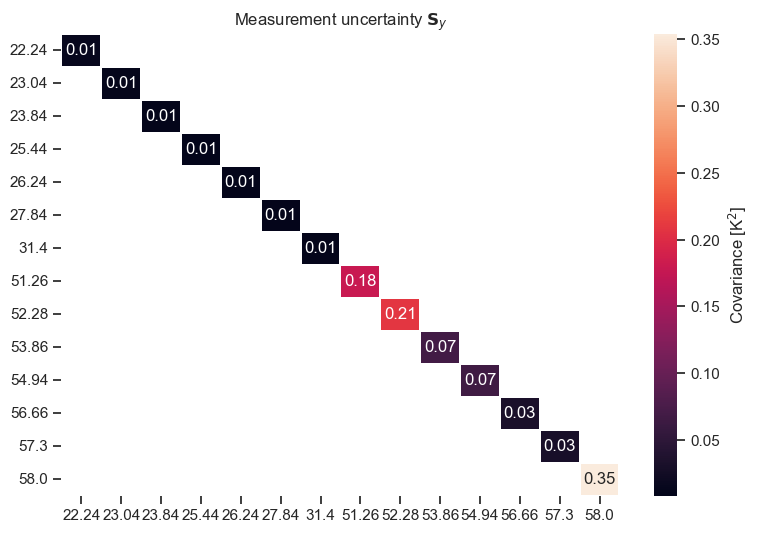

In [33]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(
    S_y.where(S_y > 0), 
    annot=True, 
    fmt='.2f', 
    ax=ax, 
    linewidths=.05, 
    cbar_kws={'label':'Covariance [K$^2$]'}
)
ax.set_title(r'Measurement uncertainty $\mathbf{S}_{y}$')

In [34]:
x_a = x_mean.sel(season='SON').to_pandas()[x_vars]
S_a = x_cov.sel(season='SON').to_pandas().loc[x_vars, x_vars]

In [35]:
singularMatrix = np.array([[1,0,0], [1,0,1e-50], [1,1e-50,0]])
np.linalg.inv(singularMatrix)

array([[ 1.e+00,  0.e+00,  0.e+00],
       [-1.e+50,  0.e+00,  1.e+50],
       [-1.e+50,  1.e+50,  0.e+00]])

In [36]:
x_truth

state
00000_t    285.150000
00711_t    283.150000
01574_t    282.750000
02290_t    281.550000
02983_t    279.950000
03604_t    278.950000
03741_t    279.350000
04376_t    280.150000
05039_t    275.950000
05623_t    268.050000
06064_t    261.650000
06308_t    260.850000
06478_t    259.450000
06641_t    256.050000
06880_t    255.450000
07056_t    254.650000
07214_t    250.050000
07340_t    250.050000
07351_t    249.450000
07386_t    235.450000
00000_q      1.794146
00711_q      1.821439
01574_q      1.600540
02290_q      1.563754
02983_q      1.721745
03604_q      1.381985
03741_q      1.348802
04376_q      1.353143
05039_q      1.366170
05623_q      1.584748
06064_q      1.749522
06308_q      1.784752
06478_q      1.512564
06641_q      1.736748
06880_q      1.774168
07056_q      0.915017
07214_q      1.059896
07340_q      1.597105
07351_q      1.509124
07386_q      1.870217
Name: 2018-11-24 12:00:00, dtype: float64

In [37]:
import pandas as pd

# Assuming 'series' is your pandas Series
has_nan = x_truth.isna().any()

# Print whether there are NaN values
print("Are there any NaN values in the series?", has_nan)


Are there any NaN values in the series? False


In [38]:
try:
    pyOE.invertMatrix(singularMatrix)
except Exception as err:
    traceback.print_tb(err.__traceback__)

  File "C:\Users\angsh\AppData\Local\Temp\ipykernel_19484\384370707.py", line 2, in <module>
    pyOE.invertMatrix(singularMatrix)
  File "C:\Users\angsh\anaconda3\envs\pyvenv\lib\site-packages\pyOptimalEstimation\pyOEcore.py", line 1485, in invertMatrix
    raise ValueError("Found singular matrix", UserWarning)


In [39]:
forwardKwArgs = dict(
    pressure=pressure.loc['SON'].values,
    zenithAngle=0,
    frequencies=frequencies
)

In [40]:
x_truth

state
00000_t    285.150000
00711_t    283.150000
01574_t    282.750000
02290_t    281.550000
02983_t    279.950000
03604_t    278.950000
03741_t    279.350000
04376_t    280.150000
05039_t    275.950000
05623_t    268.050000
06064_t    261.650000
06308_t    260.850000
06478_t    259.450000
06641_t    256.050000
06880_t    255.450000
07056_t    254.650000
07214_t    250.050000
07340_t    250.050000
07351_t    249.450000
07386_t    235.450000
00000_q      1.794146
00711_q      1.821439
01574_q      1.600540
02290_q      1.563754
02983_q      1.721745
03604_q      1.381985
03741_q      1.348802
04376_q      1.353143
05039_q      1.366170
05623_q      1.584748
06064_q      1.749522
06308_q      1.784752
06478_q      1.512564
06641_q      1.736748
06880_q      1.774168
07056_q      0.915017
07214_q      1.059896
07340_q      1.597105
07351_q      1.509124
07386_q      1.870217
Name: 2018-11-24 12:00:00, dtype: float64

In [41]:
# forwardKwArgs = dict(
#     pressure=pressure.loc['SON'].values,
#     zenithAngle=0,
#     frequencies=frequencies
# )

y_obs = forwardRT(x_truth, **forwardKwArgs)
y_obs = pd.Series(y_obs, index=y_vars)
assert np.all(np.isfinite(y_obs))

In [42]:
oe_ref = pyOE.optimalEstimation(
    x_vars,       # state variable names
    x_a,          # a priori
    S_a,          # a priori uncertainty
    y_vars,       # measurement variable names
    y_obs,        # observations
    S_y,      # observation uncertainty
    forwardRT,    # forward Operator
    forwardKwArgs=forwardKwArgs,  # additional function arguments
    x_truth=x_truth,              # true profile
)


In [43]:
oe_ref.doRetrieval()

0.21 s, iteration 1, degrees of freedom: 1.92 of 40, converged (x-space):  0.001


0.31 s, iteration 2, degrees of freedom: 1.92 of 40, done.  0.000


True

In [44]:
print(oe_ref.x_op[:10])
print(oe_ref.S_op[:10])

00000_q      1.842405
00000_t    285.149734
00711_q      1.753160
00711_t    283.162688
01574_q      1.724926
01574_t    278.448124
02290_q      1.708366
02290_t    274.304719
02983_q      1.690869
02983_t    270.280395
dtype: float64
          00000_q   00000_t   00711_q   00711_t   01574_q    01574_t  \
00000_q  0.018878 -0.001214  0.015077 -0.000209  0.013650   0.037678   
00000_t -0.001214  0.010379 -0.000538 -0.124355 -0.000371  -0.164646   
00711_q  0.015077 -0.000538  0.040745 -0.020412  0.033201   0.318858   
00711_t -0.000209 -0.124355 -0.020412  1.769410 -0.018223   2.145214   
01574_q  0.013650 -0.000371  0.033201 -0.018223  0.049956   0.279878   
01574_t  0.037678 -0.164646  0.318858  2.145214  0.279878  48.409503   
02290_q  0.012157 -0.000261  0.026096 -0.015463  0.039693   0.230965   
02290_t  0.021659 -0.192717  0.428305  2.491012  0.371495  61.079002   
02983_q  0.011995 -0.000310  0.023579 -0.013410  0.035413   0.240657   
02983_t  0.062615 -0.208004  0.549500  2.6233

In [45]:
print(oe_ref.x_op_err[:10])

00000_q     0.137397
00000_t     0.101879
00711_q     0.201854
00711_t     1.330192
01574_q     0.223507
01574_t     6.957694
02290_q     0.239300
02290_t     9.913798
02983_q     0.249396
02983_t    12.825710
dtype: float64


In [46]:
print('total', oe_ref.dgf)
print(oe_ref.dgf_x[:10])

total 1.9236859243890756
00000_q    3.543788e-03
00000_t    9.970197e-01
00711_q    1.267582e-03
00711_t    9.218237e-01
01574_q    6.739058e-08
01574_t    3.106872e-05
02290_q    3.185781e-12
02290_t    5.705250e-10
02983_q    0.000000e+00
02983_t    0.000000e+00
dtype: float64


In [47]:
help(oe_ref)

Help on optimalEstimation in module pyOptimalEstimation.pyOEcore object:

class optimalEstimation(builtins.object)
 |  optimalEstimation(x_vars, x_a, S_a, y_vars, y_obs, S_y, forward, userJacobian=None, x_truth=None, b_vars=[], b_p=[], S_b=[[]], x_lowerLimit={}, x_upperLimit={}, useFactorInJac=False, gammaFactor=None, perturbation=0.1, disturbance=None, convergenceFactor=10, convergenceTest='x', forwardKwArgs={}, multipleForwardKwArgs=None, verbose=None)
 |  
 |  The core optimalEstimation class, which contains all required parameters.
 |  See [1]_ for an extensive introduction into Optimal Estimation theory, 
 |  [2]_ discusses this library
 |  
 |  Parameters
 |  ----------
 |  x_vars : list of str
 |      names of the elements of state vector x.
 |  x_a : pd.Series or list or np.ndarray
 |      prior information of state x.
 |  S_a : pd.DataFrame or list or np.ndarray
 |      covariance matrix of state x.
 |  y_vars : list of str
 |      names of the elements of state vector x
 |  y

C:\Users\angsh\anaconda3\envs\pyvenv\lib\site-packages\pyOptimalEstimation\pyOEcore.py:1339: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sp4.set_xticklabels(xlabels)


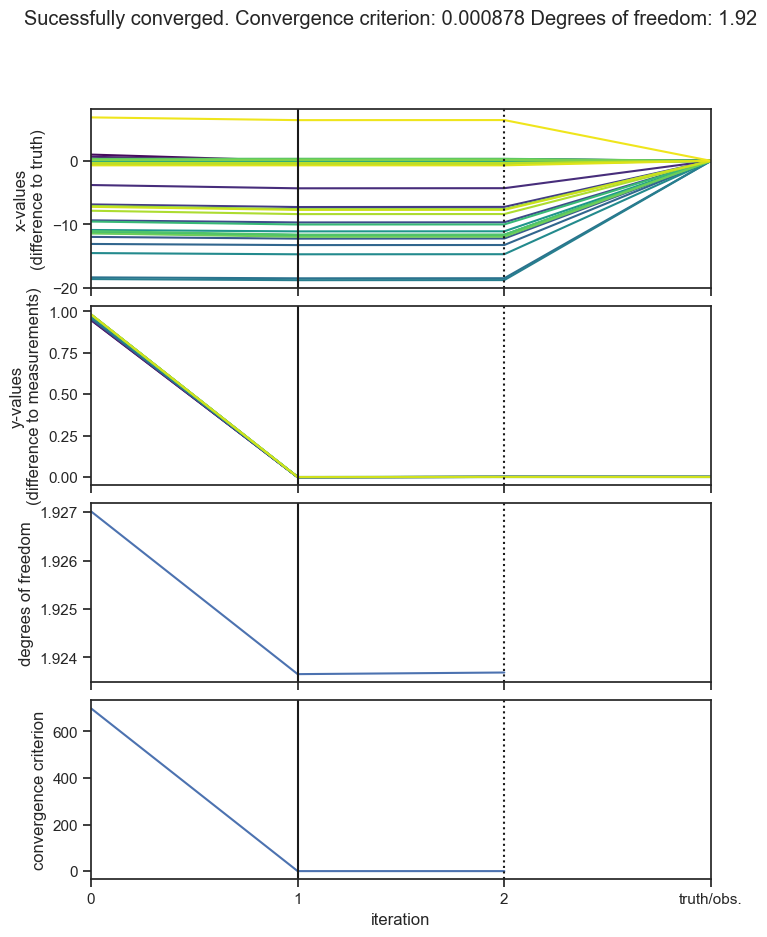

In [48]:
fig = oe_ref.plotIterations(legend=False, mode='difference')

In [49]:
oe_ref.x_op

00000_q      1.842405
00000_t    285.149734
00711_q      1.753160
00711_t    283.162688
01574_q      1.724926
01574_t    278.448124
02290_q      1.708366
02290_t    274.304719
02983_q      1.690869
02983_t    270.280395
03604_q      1.662790
03604_t    266.729995
03741_q      1.641523
03741_t    266.106742
04376_q      1.601692
04376_t    261.678938
05039_q      1.565209
05039_t    257.185465
05623_q      1.508810
05623_t    253.358613
06064_q      1.452745
06064_t    250.563489
06308_q      1.402286
06308_t    249.183671
06478_q      1.342101
06478_t    247.802571
06641_q      1.324722
06641_t    246.044243
06880_q      1.285289
06880_t    243.836283
07056_q      1.239502
07056_t    242.711030
07214_q      1.200311
07214_t    242.460615
07340_q      1.156588
07340_t    241.680226
07351_q      1.180315
07351_t    241.741144
07386_q      1.165305
07386_t    241.869134
dtype: float64

Text(0.5, 1.0, '$\\mathbf{S}_{op}$ Humidity')

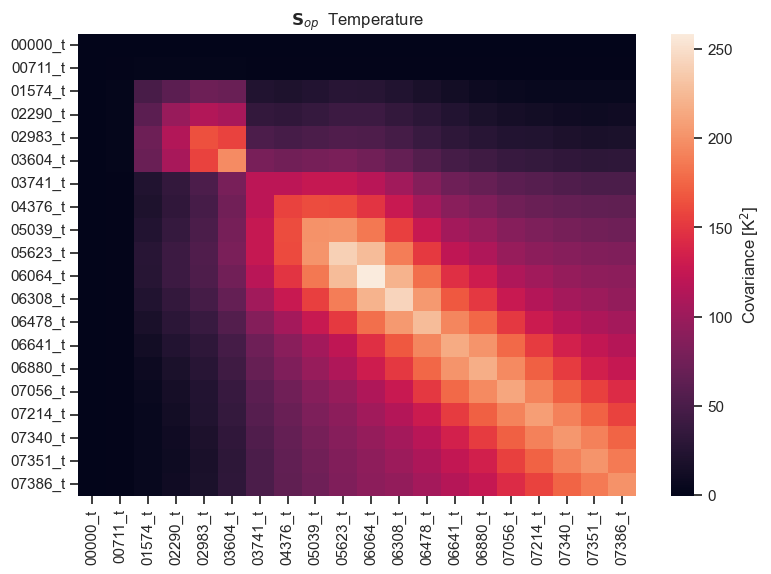

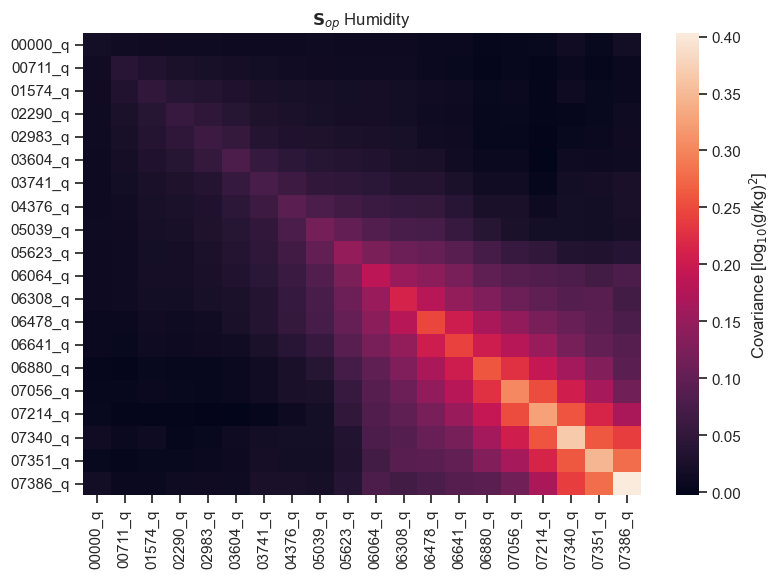

In [50]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(oe_ref.S_op .iloc[1::2, 1::2], ax=ax, cbar_kws={'label':'Covariance [K$^2$]'})
ax.set_title('$\mathbf{S}_{op}$  Temperature')

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(oe_ref.S_op .iloc[::2, ::2], ax=ax, cbar_kws={'label':'Covariance [log$_{10}$(g/kg)$^2$]'})
ax.set_title('$\mathbf{S}_{op}$ Humidity')

In [51]:
oe_ref.x_op_err

00000_q     0.137397
00000_t     0.101879
00711_q     0.201854
00711_t     1.330192
01574_q     0.223507
01574_t     6.957694
02290_q     0.239300
02290_t     9.913798
02983_q     0.249396
02983_t    12.825710
03604_q     0.280024
03604_t    13.998615
03741_q     0.273972
03741_t    10.949127
04376_q     0.305620
04376_t    12.533636
05039_q     0.343729
05039_t    14.153241
05623_q     0.385543
05623_t    15.501348
06064_q     0.430590
06064_t    16.078638
06308_q     0.460464
06308_t    15.595944
06478_q     0.496387
06478_t    15.049447
06641_q     0.494045
06641_t    14.673090
06880_q     0.509223
06880_t    14.754931
07056_q     0.549398
07056_t    14.591889
07214_q     0.570821
07214_t    14.414328
07340_q     0.606595
07340_t    14.260673
07351_q     0.589089
07351_t    14.205287
07386_q     0.634710
07386_t    14.141758
dtype: float64

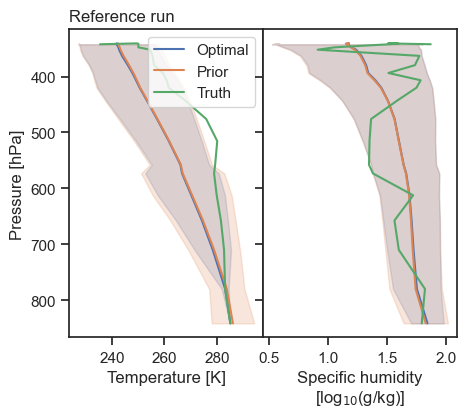

In [52]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='Reference run')

In [53]:
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_ref.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_ref.x_truth)

print('RMS X Temperature: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('RMS X Humidity: %g [log$_{10}$(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))
print('RMS Y %g [K]'% np.sqrt(np.mean((oe_ref.y_obs - oe_ref.y_op)**2)))

RMS X Temperature: 10.9518 [K]
RMS X Humidity: 23.9508 [log$_{10}$(g/kg)]
RMS Y 0.000154276 [K]


In [54]:
chiSquareTest = oe_ref.chiSquareTest(significance=0.05)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 40. (This is typically safe to ignore)       


In [55]:
print('\nTests passed:\n' ,chiSquareTest[0])


Tests passed:
 chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [56]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_ref.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True


In [57]:
x_a = x_mean.sel(season='SON').to_pandas()  # as before
S_a = x_cov.sel(season='SON')  # as before
S_a_diag = np.diag(np.diag(S_a))

In [58]:
oe_diag = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a_diag,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_diag.doRetrieval()

0.22 s, iteration 1, degrees of freedom: 1.96 of 40, converged (x-space):  0.001
0.31 s, iteration 2, degrees of freedom: 1.96 of 40, done.  0.000


True

In [59]:
oe_diag.dgf, oe_ref.dgf

(1.9598686833651224, 1.9236859243890756)

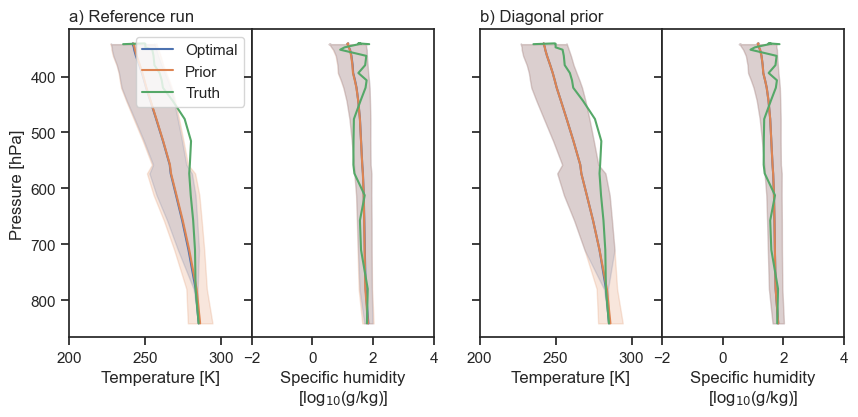

In [60]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_diag,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Diagonal prior',
    xlimT = (200, 320),
    xlimH = (-2,4),
)


In [61]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Diagonal prior:')
supporting_routines.print_mwr_rms(oe_diag)


Reference run:
RMS X Temperature: 10.9518 [K]
RMS X Humidity: 23.9508 [log$_{10}$(g/kg)]
RMS Y 0.000154276 [K]
Diagonal prior:
RMS X Temperature: 10.6907 [K]
RMS X Humidity: 24.007 [log$_{10}$(g/kg)]
RMS Y 0.000898795 [K]


In [62]:
print(oe_diag.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [63]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_diag.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True


In [64]:
x_a = x_mean.sel(season='MAM').to_pandas()
S_a = x_cov.sel(season='MAM').to_pandas()
forwardKwArgs = dict(
    pressure=pressure.loc['MAM'].values,
    zenithAngle=0,
    frequencies=frequencies
)

In [65]:
oe_sum = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_sum.doRetrieval()

0.21 s, iteration 1, degrees of freedom: 1.94 of 40, converged (x-space):  0.001
0.30 s, iteration 2, degrees of freedom: 1.94 of 40, done.  0.000


True

In [66]:
oe_ref.dgf, oe_sum.dgf

(1.9236859243890756, 1.9364640887208888)

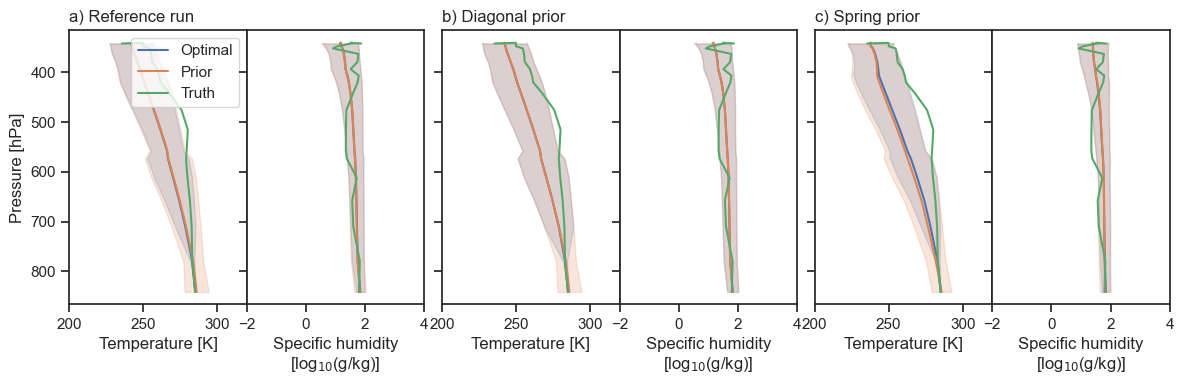

In [67]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_diag,
    oe3 = oe_sum,
    h=pressure.loc['SON'] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Diagonal prior',
    title3='c) Spring prior',
    xlimT = (200, 320),
    xlimH = (-2,4),
)
fig.tight_layout()
fig.savefig('Figure2.png', dpi=200)
fig.savefig('Figure2.pdf')

In [68]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Spring prior:')
supporting_routines.print_mwr_rms(oe_sum)

Reference run:
RMS X Temperature: 10.9518 [K]
RMS X Humidity: 23.9508 [log$_{10}$(g/kg)]
RMS Y 0.000154276 [K]
Spring prior:
RMS X Temperature: 14.2232 [K]
RMS X Humidity: 22.8173 [log$_{10}$(g/kg)]
RMS Y 0.00417478 [K]


In [69]:
print(oe_sum.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [70]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_sum.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True


In [71]:
S_b = pd.DataFrame(
    np.array([
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 3.0, 3.3, 1.2, 0.1, 0.0, 0.0, 0.0],
        [0.3, 0.3, 0.4, 0.4, 0.4, 0.5, 0.7, 8.7, 9.2, 3.3, 0.3, 0.0, 0.0, 0.0],
        [0.3, 0.4, 0.4, 0.4, 0.5, 0.5, 0.7, 8.2, 8.7, 3.0, 0.3, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.7, 0.7, 0.2, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.5, 0.5, 0.2, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
    ]),
    index=frequencies[::-1],
    columns=frequencies)

Text(0.5, 1.0, "Model uncertainty $\\mathbf{S}_{b}$' (Cimini et al. 2018)")

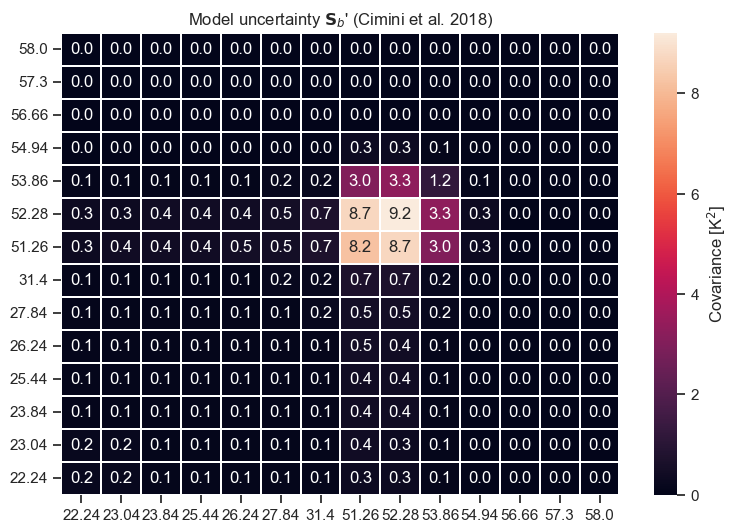

In [72]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(
    S_b, 
    annot=True, 
    linewidths=.05, 
    ax=ax, 
    fmt='.1f', 
    cbar_kws={'label':'Covariance [K$^2$]'}
)
ax.set_title(r"Model uncertainty $\mathbf{S}_{b}$' (Cimini et al. 2018)")

In [73]:
x_a = x_mean.sel(season='SON').to_pandas() # as for the reference run
S_a = x_cov.sel(season='SON').to_pandas() # as for the reference run
S_e = S_y + S_b

assert (S_e.values == S_e.values.T).all()

forwardKwArgs = dict(
    pressure=pressure.loc['SON'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_b = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_b.doRetrieval()

0.20 s, iteration 1, degrees of freedom: 1.58 of 40, converged (x-space):  0.000


0.30 s, iteration 2, degrees of freedom: 1.58 of 40, done.  0.000


True

In [74]:
oe_ref.dgf, oe_b.dgf

(1.9236859243890756, 1.5762328940786061)

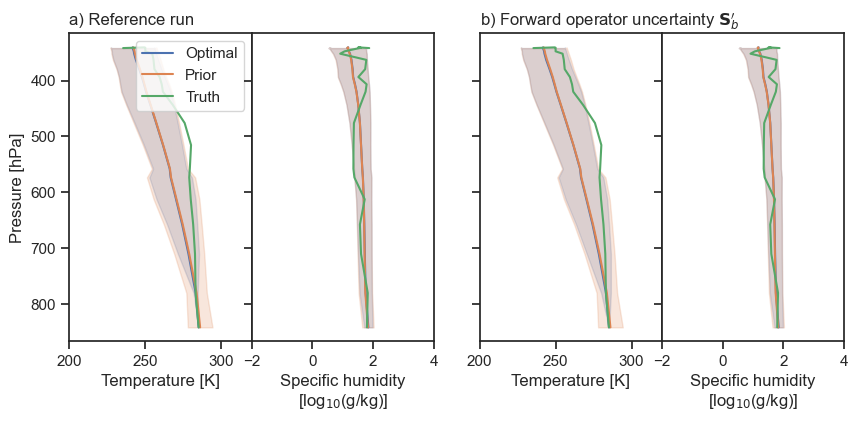

In [75]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_b,
    h=pressure.loc['SON'] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2="b) Forward operator uncertainty $\mathbf{S}_b'$",
    xlimT = (200, 320),
    xlimH = (-2,4),
)

In [76]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Concidering forward model error:')
supporting_routines.print_mwr_rms(oe_b)


Reference run:
RMS X Temperature: 10.9518 [K]
RMS X Humidity: 23.9508 [log$_{10}$(g/kg)]
RMS Y 0.000154276 [K]
Concidering forward model error:
RMS X Temperature: 10.9304 [K]
RMS X Humidity: 23.9521 [log$_{10}$(g/kg)]
RMS Y 0.00124377 [K]


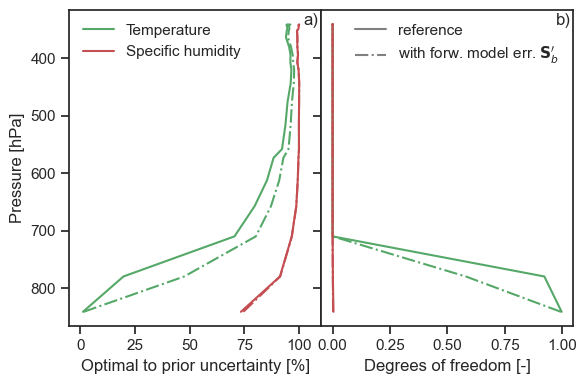

In [77]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_b, 'with forw. model err. $\mathbf{S}_b\'$',
    pressure.loc['SON'] / 100,
)
fig.tight_layout()
fig.subplots_adjust(wspace=0)
fig.savefig('Figure3.png', dpi=200)
fig.savefig('Figure3.pdf')

In [78]:
((oe_b.x_op_err/oe_b.x_a_err) - (oe_ref.x_op_err/oe_ref.x_a_err)).max() * 100

27.75163462664217

In [79]:
print('Change in degrees of freedom for temperature variables %g' %
      (supporting_routines.splitTQ(oe_ref.dgf_x)[0].sum() -
       supporting_routines.splitTQ(oe_b.dgf_x)[0].sum()))
print('Change in degrees of freedom for humidity variables %g' %
      (supporting_routines.splitTQ(oe_ref.dgf_x)[1].sum() -
       supporting_routines.splitTQ(oe_b.dgf_x)[1].sum()))

Change in degrees of freedom for temperature variables 0.345497
Change in degrees of freedom for humidity variables 0.00195636


In [80]:
print(oe_b.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_ref.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
Linearity test passed:  True


In [81]:
x_a = x_mean.sel(season='SON').to_pandas() # as reference
S_a = x_cov.sel(season='SON').to_pandas() # as reference
S_e = S_y * 4
forwardKwArgs = dict(
    pressure=pressure.loc['SON'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_double = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_double.doRetrieval()

0.21 s, iteration 1, degrees of freedom: 1.75 of 40, converged (x-space):  0.000


0.30 s, iteration 2, degrees of freedom: 1.75 of 40, done.  0.000


True

In [82]:
S_e = S_y / 4

oe_half = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_half.doRetrieval()

0.21 s, iteration 1, degrees of freedom: 1.98 of 40, converged (x-space):  0.003
0.31 s, iteration 2, degrees of freedom: 1.98 of 40, done.  0.000


True

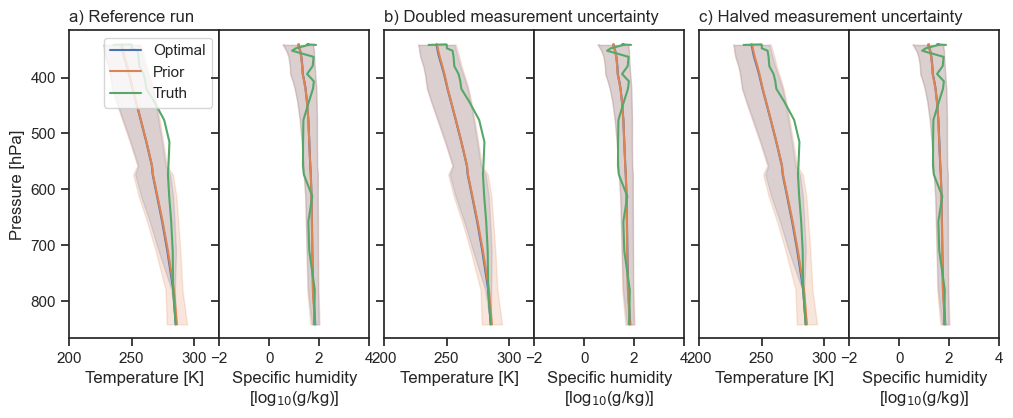

In [83]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_double,
    oe3 = oe_half,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Doubled measurement uncertainty',
    title3='c) Halved measurement uncertainty',
    xlimT = (200, 320),
    xlimH = (-2, 4),
)

In [84]:
print('### Reference run ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_ref.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_ref.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))

print('\n### Doubled measurement uncertainty ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_double.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_double.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))

print('\n### Halved measurement uncertainty ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_half.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_half.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))


### Reference run ###
Temperature RMS difference to x_a: 0.448485 [K]
Humidity RMS difference to x_a: 0.673298 [log10(g/kg)]

### Doubled measurement uncertainty ###
Temperature RMS difference to x_a: 0.441713 [K]
Humidity RMS difference to x_a: 0.676312 [log10(g/kg)]

### Halved measurement uncertainty ###
Temperature RMS difference to x_a: 0.450716 [K]
Humidity RMS difference to x_a: 0.672312 [log10(g/kg)]


Change in degrees of freedom for halved measurement uncertainties -0.0560819
Change in degrees of freedom for doubled measurement uncertainties 0.17205


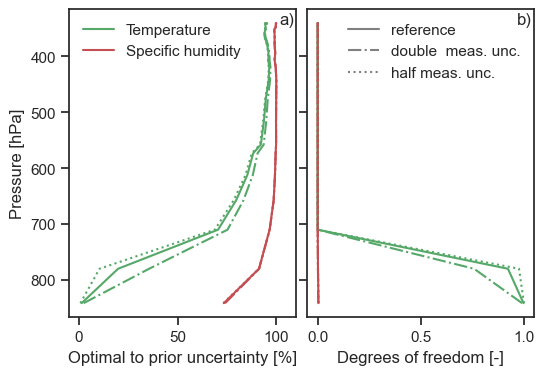

In [85]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_double, 'double  meas. unc.',
    pressure.loc['SON'] / 100,
    oe3=oe_half, label3 = 'half meas. unc.'
)

print('Change in degrees of freedom for halved measurement uncertainties %g' %
      (oe_ref.dgf - oe_half.dgf))
print('Change in degrees of freedom for doubled measurement uncertainties %g' %
      (oe_ref.dgf - oe_double.dgf))


In [86]:
print(oe_double.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_double.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
Linearity test passed:  True


In [87]:
print(oe_half.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_half.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
Linearity test passed:  True


Text(0.5, 1.0, 'Measurement uncertainty $\\mathbf{S}_{y}$ including non-diagonal elements.')

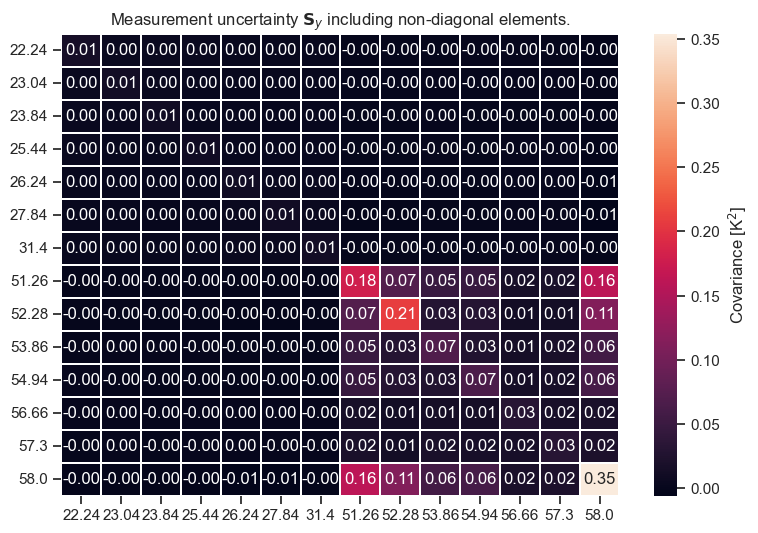

In [88]:
S_y_nondiag = np.array(
    [[
        1.4464e-02, 3.1175e-03, 3.2584e-03, 2.7590e-03, 2.1494e-03, 1.8121e-03,
        2.3444e-03, -2.8253e-03, -1.1941e-03, -7.1487e-04, -7.1019e-05,
        -1.3676e-04, -3.0526e-04, -3.8639e-03
    ],
     [
         3.1175e-03, 1.1803e-02, 2.5663e-03, 2.1457e-03, 1.5946e-03,
         1.6916e-03, 1.8975e-03, -7.3124e-04, -4.7555e-04, 1.8126e-04,
         -8.1855e-04, 4.6114e-04, 3.1963e-06, -2.5867e-03
     ],
     [
         3.2584e-03, 2.5663e-03, 1.0841e-02, 2.3239e-03, 1.1311e-03,
         1.1062e-03, 1.5767e-03, -6.4790e-04, -1.3201e-03, 1.7669e-04,
         -1.0165e-03, -4.5220e-04, -5.8443e-04, -1.9019e-03
     ],
     [
         2.7590e-03, 2.1457e-03, 2.3239e-03, 8.4360e-03, 1.3579e-03,
         1.5264e-03, 1.4780e-03, -8.7548e-04, -1.5626e-03, -1.7332e-04,
         -4.6437e-04, -1.8432e-04, -1.7265e-04, -3.8433e-03
     ],
     [
         2.1494e-03, 1.5946e-03, 1.1311e-03, 1.3579e-03, 1.0352e-02,
         3.3218e-03, 3.1755e-03, -2.2734e-03, -2.3389e-03, -1.2198e-03,
         -7.2950e-04, 2.0710e-04, 2.5822e-04, -5.9091e-03
     ],
     [
         1.8121e-03, 1.6916e-03, 1.1062e-03, 1.5264e-03, 3.3218e-03,
         1.0172e-02, 3.2801e-03, -2.0768e-03, -2.1563e-03, -4.6483e-04,
         -1.6465e-03, 9.4358e-05, -2.8649e-04, -5.4612e-03
     ],
     [
         2.3444e-03, 1.8975e-03, 1.5767e-03, 1.4780e-03, 3.1755e-03,
         3.2801e-03, 1.1026e-02, -3.1658e-04, -1.1692e-03, -7.5206e-04,
         -1.0920e-03, -3.7627e-05, -2.0978e-04, -1.7690e-03
     ],
     [
         -2.8253e-03, -7.3124e-04, -6.4790e-04, -8.7548e-04, -2.2734e-03,
         -2.0768e-03, -3.1658e-04, 1.7896e-01, 7.2248e-02, 4.8262e-02,
         4.6481e-02, 1.6283e-02, 1.8456e-02, 1.6027e-01
     ],
     [
         -1.1941e-03, -4.7555e-04, -1.3201e-03, -1.5626e-03, -2.3389e-03,
         -2.1563e-03, -1.1692e-03, 7.2248e-02, 2.0847e-01, 2.8595e-02,
         2.9832e-02, 1.1226e-02, 1.3614e-02, 1.1240e-01
     ],
     [
         -7.1487e-04, 1.8126e-04, 1.7669e-04, -1.7332e-04, -1.2198e-03,
         -4.6483e-04, -7.5206e-04, 4.8262e-02, 2.8595e-02, 6.9126e-02,
         2.5361e-02, 1.3994e-02, 1.8141e-02, 5.6810e-02
     ],
     [
         -7.1019e-05, -8.1855e-04, -1.0165e-03, -4.6437e-04, -7.2950e-04,
         -1.6465e-03, -1.0920e-03, 4.6481e-02, 2.9832e-02, 2.5361e-02,
         6.5223e-02, 1.3962e-02, 1.6982e-02, 6.0963e-02
     ],
     [
         -1.3676e-04, 4.6114e-04, -4.5220e-04, -1.8432e-04, 2.0710e-04,
         9.4358e-05, -3.7627e-05, 1.6283e-02, 1.1226e-02, 1.3994e-02,
         1.3962e-02, 3.1456e-02, 1.7948e-02, 1.8197e-02
     ],
     [
         -3.0526e-04, 3.1963e-06, -5.8443e-04, -1.7265e-04, 2.5822e-04,
         -2.8649e-04, -2.0978e-04, 1.8456e-02, 1.3614e-02, 1.8141e-02,
         1.6982e-02, 1.7948e-02, 3.0822e-02, 2.1850e-02
     ],
     [
         -3.8639e-03, -2.5867e-03, -1.9019e-03, -3.8433e-03, -5.9091e-03,
         -5.4612e-03, -1.7690e-03, 1.6027e-01, 1.1240e-01, 5.6810e-02,
         6.0963e-02, 1.8197e-02, 2.1850e-02, 3.5390e-01
     ]])

S_y_nondiag = pd.DataFrame(
    S_y_nondiag,
    index=y_vars,
    columns=y_vars,
)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_y_nondiag, annot=True, fmt='.2f', ax=ax, linewidths=.05, cbar_kws={'label':'Covariance [K$^2$]'})

ax.set_title(r'Measurement uncertainty $\mathbf{S}_{y}$ including non-diagonal elements.')



In [89]:
x_a = x_mean.sel(season='SON').to_pandas()[x_vars] # as reference run
S_a = x_cov.sel(season='SON').to_pandas().loc[x_vars, x_vars] # as reference run
S_e = S_y_nondiag

forwardKwArgs = dict(
    pressure=pressure.loc['SON'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_nondiag = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_nondiag.doRetrieval()

0.21 s, iteration 1, degrees of freedom: 1.88 of 40, converged (x-space):  0.000
0.30 s, iteration 2, degrees of freedom: 1.88 of 40, done.  0.000


True

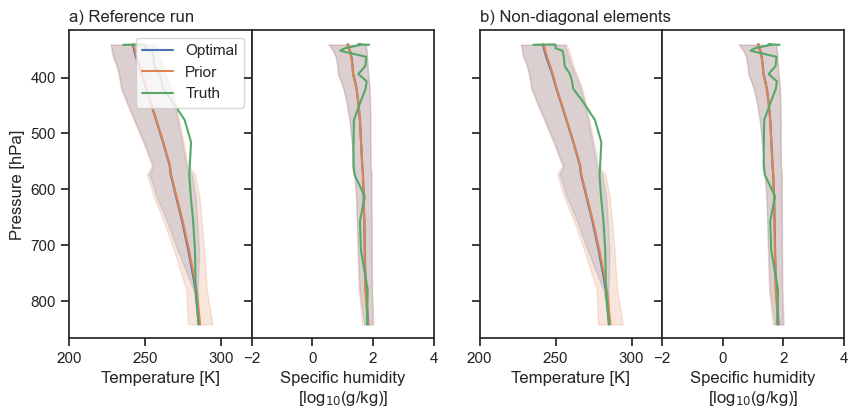

In [90]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_nondiag,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Non-diagonal elements',
    xlimT = (200, 320),
    xlimH = (-2,4),
)

In [91]:
oe_nondiag.dgf - oe_ref.dgf

-0.0415437598862165

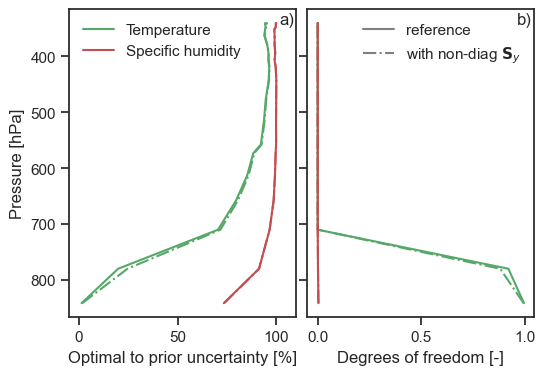

In [92]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_nondiag, 'with non-diag $\mathbf{S}_y$',
    pressure.loc['SON'] / 100,
)

In [93]:
print(oe_nondiag.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_nondiag.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
Linearity test passed:  True


In [94]:
x_a = x_mean.sel(season='SON').to_pandas()  # as reference run
S_a = x_cov.sel(season='SON').to_pandas()   # as reference run

In [95]:
oe_testy = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
    convergenceTest='y'
)
oe_testy.doRetrieval()

0.21 s, iteration 1, degrees of freedom: 1.92 of 40, not converged (y-space):  35.628
0.30 s, iteration 2, degrees of freedom: 1.92 of 40, converged (y-space):  0.002


0.40 s, iteration 3, degrees of freedom: 1.92 of 40, done.  0.000


True

In [96]:
oe_testy.dgf, oe_ref.dgf

(1.9236861390661282, 1.9236859243890756)

In [97]:
print('Reference run with test in x-space:')
supporting_routines.print_mwr_rms(oe_ref)
print('Test in y-space:')
supporting_routines.print_mwr_rms(oe_testy)


Reference run with test in x-space:
RMS X Temperature: 10.9518 [K]
RMS X Humidity: 23.9508 [log$_{10}$(g/kg)]
RMS Y 0.000154276 [K]
Test in y-space:
RMS X Temperature: 10.9517 [K]
RMS X Humidity: 23.9508 [log$_{10}$(g/kg)]
RMS Y 0.000154572 [K]


In [98]:
print(oe_testy.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [99]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_testy.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True
